# infos

In [ ]:
# Version 1.2 finale

# Notebook d'analyse des données

### Changelogs :

v1.2 :
- Version finale
- Revue graphiques

v1.1 :
- Nettoyage du code pour livraison projet

v1.0 :
- Analyse des données, première version

# Definition des URL

In [53]:
# Vérifier que les chemins soient correct avant toutes opérations
url_img = '../../images'

# Librairies à charger

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import DF

In [2]:
# Importer les DF à analyser
observations_mushroom_cleaned  = pd.read_csv('../data/observations_mushroom_cleaned.csv', low_memory=False)
observations_mushroom_cleaned_sorted_rank  = pd.read_csv('../data/observations_mushroom_cleaned_sorted_rank.csv', low_memory=False)
observations_mushroom_key  = pd.read_csv('../data/observations_mushroom_key.csv', low_memory=False)
model_data_10_filtered  = pd.read_csv('../data/model_data_10_filtered.csv', low_memory=False)

In [56]:
# Suppression des NaN
observations_mushroom_key.dropna(inplace=True)
observations_mushroom_key.isna().sum()

image_lien           0
speciesKey           0
orderKey             0
classKey             0
scientificNameKey    0
familyKey            0
kingdomKey           0
genusKey             0
phylumKey            0
dtype: int64

# Analyses DataFrames

## Recherches de corrélations sur les variables

Etude des corrélations entre les variables. On utilise pour cela les variables '...Key' qui sont des variables en int ou float et correspondent aux même noms de variables '..' (sans le suffixe 'Key').

_En somme, les variables '...Key' sont des variables encodées._

In [20]:
matrice_corr = observations_mushroom_key.corr()
print('Seules les variables usageKey et speciesKey présentent une corrélation supérieure à 90%. Dans le cas présent : 97% \n')
matrice_corr

Seules les variables usageKey et speciesKey présentent une corrélation supérieure à 90%. Dans le cas présent : 97% 



C:\Users\guill\AppData\Local\Temp\ipykernel_4948\885535004.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrice_corr = observations_mushroom_key.corr()


,speciesKey,orderKey,classKey,scientificNameKey,familyKey,kingdomKey,genusKey,phylumKey
speciesKey,1.000000,0.044955,0.015566,0.924170,0.004563,0.009525,0.267921,-0.022376
orderKey,0.044955,1.000000,0.537252,0.037200,0.000023,0.190359,0.072293,0.001057
classKey,0.015566,0.537252,1.000000,0.017460,-0.005498,-0.055335,0.010029,0.002764
scientificNameKey,0.924170,0.037200,0.017460,1.000000,0.006485,0.012475,0.243419,-0.021128
familyKey,0.004563,0.000023,-0.005498,0.006485,1.000000,0.159157,-0.047240,-0.001851
kingdomKey,0.009525,0.190359,-0.055335,0.012475,0.159157,1.000000,0.128976,0.149571
genusKey,0.267921,0.072293,0.010029,0.243419,-0.047240,0.128976,1.000000,0.002233
phylumKey,-0.022376,0.001057,0.002764,-0.021128,-0.001851,0.149571,0.002233,1.000000


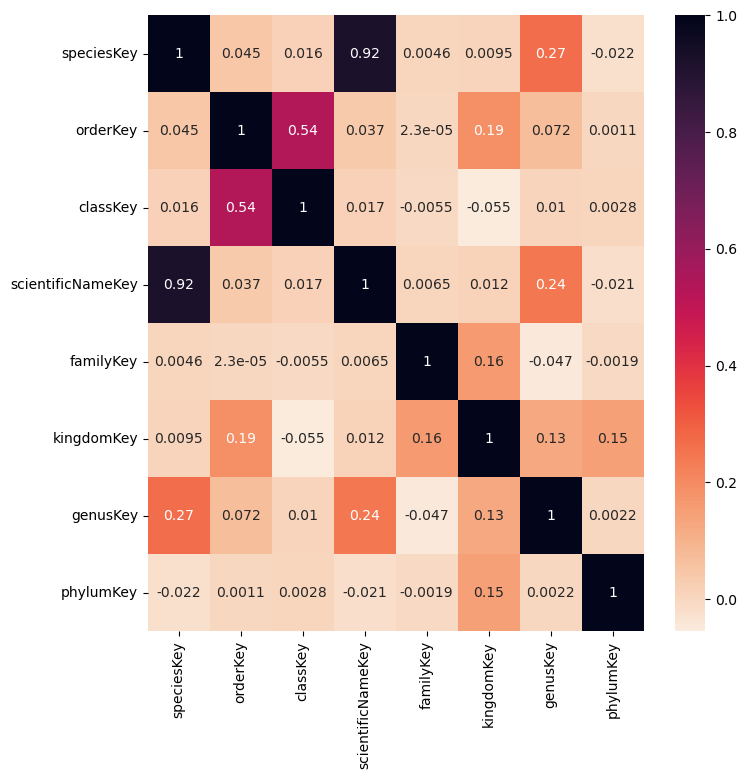

In [22]:
# Représentation sous forme de heatmap :
fig = plt.figure(figsize=(8,8))
sns.heatmap(matrice_corr, annot = True, cmap = 'rocket_r');

In [24]:
# Vérification de corrélation entre speciesKey et scientificName avec un test chi2
from scipy.stats import chi2_contingency as chi2

table = pd.crosstab(observations_mushroom_key['speciesKey'], observations_mushroom_key['scientificNameKey'])

resultats_chi2 = chi2(table)

stat = resultats_chi2[0]
p_value = resultats_chi2[1]
degre_liberte = resultats_chi2[2]

print('p_value :', p_value)

p_value : 0.0


## Répartition des ranks

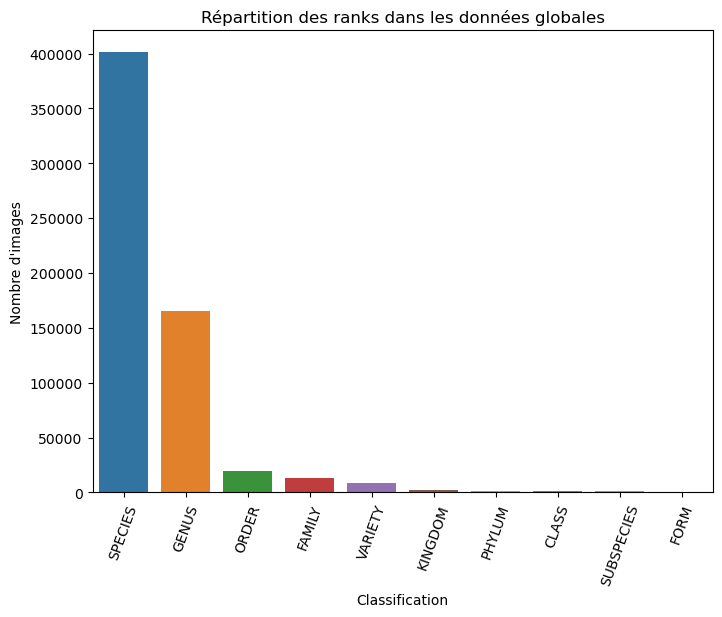

In [28]:
# Analyse de la répartition de la variable 'rank'
plt.figure(figsize=(8, 6))

sns.countplot(data = observations_mushroom_cleaned,
              x = 'rank',
              order = observations_mushroom_cleaned["rank"].value_counts().index)

plt.xlabel("Classification")
plt.xticks(rotation=70)
plt.ylabel("Nombre d'images")
plt.title("Répartition des ranks dans les données globales")
plt.show()

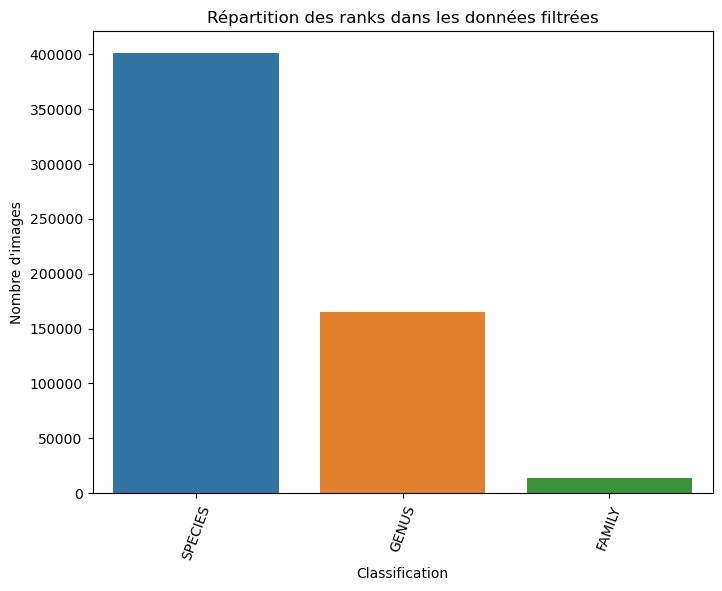

In [30]:
# Analyse de la répartition de la variable 'rank'
plt.figure(figsize=(8, 6))

sns.countplot(data = observations_mushroom_cleaned_sorted_rank,
              x = 'rank',
              order = observations_mushroom_cleaned_sorted_rank["rank"].value_counts().index)

plt.xlabel("Classification")
plt.xticks(rotation=70)
plt.ylabel("Nombre d'images")
plt.title("Répartition des ranks dans les données filtrées")
plt.show()

## Répartition espèces (variable label)

#### Tous les labels

In [32]:
# on s'interesse aux espèces représentées
print('Nombre d\'occurences uniques :')
print(observations_mushroom_cleaned_sorted_rank['label'].nunique())

print('\n Pourcentage d\'apparitions :')
print('\n', (observations_mushroom_cleaned_sorted_rank['label'].value_counts(normalize = True)*100).round(2))

Nombre d'occurences uniques :
11152

 Pourcentage d'apparitions :

 Russula                    1.42
Cortinarius                1.27
Inocybe                    0.97
Psathyrella                0.96
Mycena                     0.92
                           ... 
Cortinarius badius         0.00
Hygrocybe fuliginata       0.00
Cerogenes auricoma         0.00
Acarospora affinis         0.00
Dichostereum granulosum    0.00
Name: label, Length: 11152, dtype: float64


C:\Users\guill\AppData\Local\Temp\ipykernel_4948\2440847806.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  top10_et_reste = top10_label.append(pd.Series([reste_hors_top10], index=['Autres']))


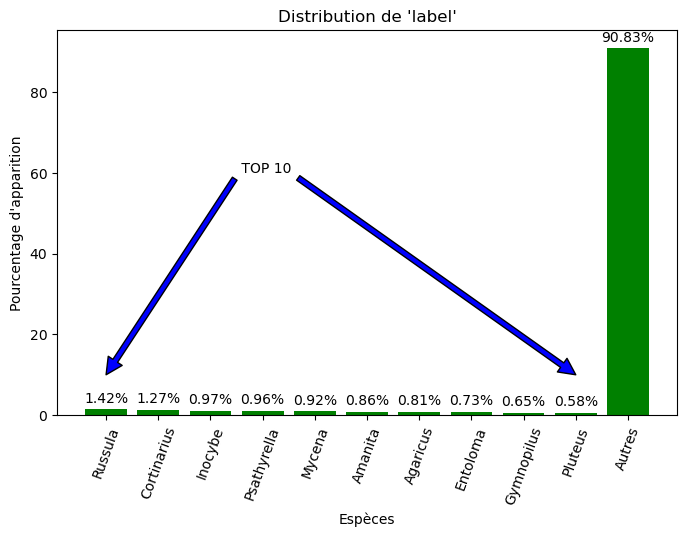

In [33]:
# Représentation de la distribution de la variable :

# Création du top 10 des espèces les plus représentées.
comptage_valeurs = observations_mushroom_cleaned_sorted_rank['label'].value_counts()
top10_label = comptage_valeurs.head(10)

# Reste des valeurs présentes :
reste_hors_top10 = comptage_valeurs.iloc[10:].sum()

# Création d'une series contenant le top 10 et le reste.
top10_et_reste = top10_label.append(pd.Series([reste_hors_top10], index=['Autres']))

# Calcul des pourcentages pour chaque valeur (espèce) :
total = observations_mushroom_cleaned_sorted_rank['label'].count()
pourcentages_valeurs_top10 = (top10_label / total) * 100    # uniquement le top 10
pourcentages_valeurs_tout = (top10_et_reste / total) * 100  # Toutes les espèces (top 10 + le reste)


# Construction du graphique :
plt.figure(figsize=(8,5))
#plt.grid(True, linestyle = '--')

plt.title('Distribution de \'label\'')
plt.xlabel('Espèces')
plt.xticks(rotation = 70)
plt.ylabel('Pourcentage d\'apparition')
plt.bar(pourcentages_valeurs_tout.index, pourcentages_valeurs_tout, color = 'g')


# Affichage les pourcentages au-dessus des barres
for i, value in enumerate(pourcentages_valeurs_tout):
    plt.text(i, value + 1, f"{value:.2f}%", ha='center', va='bottom')


plt.annotate(' TOP 10 ', xy=(9, 10), xytext=(2.5, 60), arrowprops={'facecolor':'blue'})
plt.annotate(' ', xy=(0, 10), xytext=(2.5, 60), arrowprops={'facecolor':'blue'});

#### Top10 uniquement

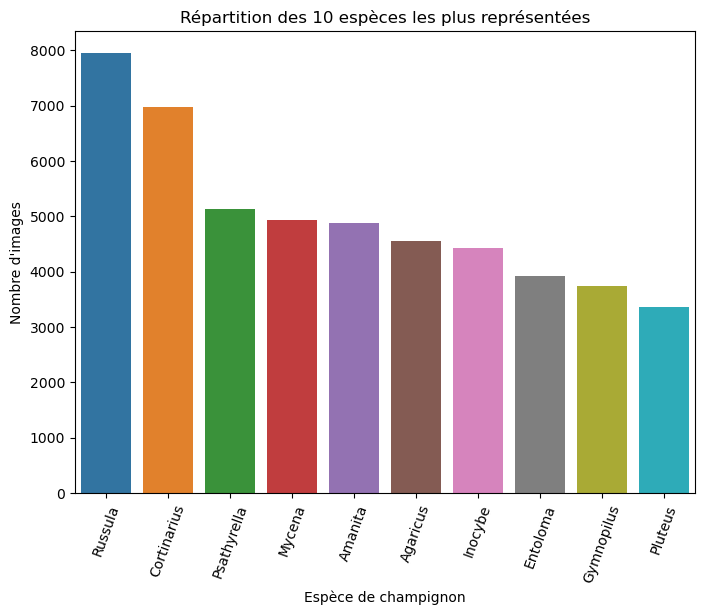

In [34]:
# Analyse de la répartition du top 10 des espèces
plt.figure(figsize=(8, 6))

sns.countplot(data=model_data_10_filtered,
              x="label",
              order=model_data_10_filtered["label"].value_counts().index)

plt.xlabel("Espèce de champignon")
plt.xticks(rotation=70)
plt.ylabel("Nombre d'images")
plt.title("Répartition des 10 espèces les plus représentées")
plt.show()

## Saisonnalité

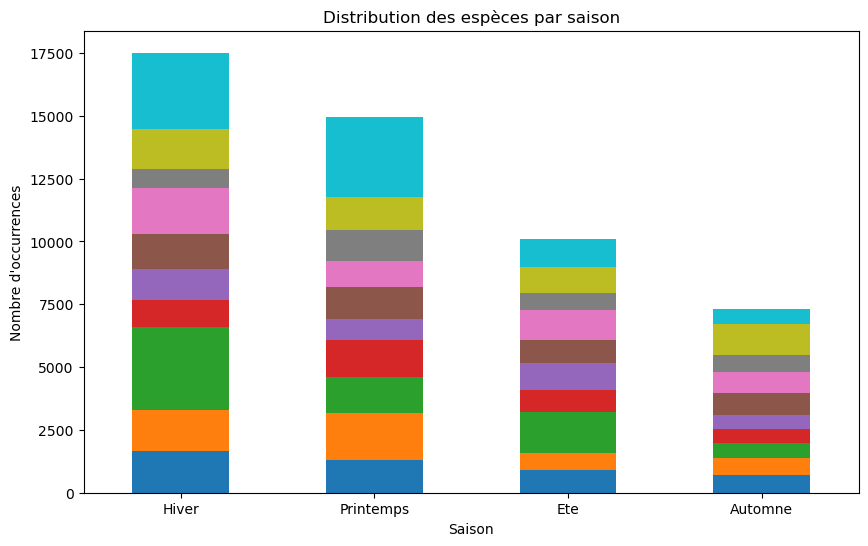

In [44]:
# On s'intéresse à la saisonnalité des observations afin d'étudier si une tendance s'en dégage
saisons_counts = model_data_10_filtered.groupby(['saison', 'label']).size().unstack(fill_value=0)
saisons_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution des espèces par saison')
plt.xlabel('Saison')
plt.ylabel('Nombre d\'occurrences')
plt.xticks([0,1,2,3], ['Hiver', 'Printemps', 'Ete', 'Automne'], rotation = 0)
plt.legend().set_visible(False);

In [45]:
total_saison = saisons_counts.sum()
saisons_counts = np.round((saisons_counts / total_saison) * 100,2)

saisons_counts = saisons_counts.T
print('Repartition especes par saison en pourcentages')
saisons_counts

Repartition especes par saison en pourcentages


saison,automne,ete,hiver,printemps
label,,,,
Agaricus,36.30,28.49,19.76,15.45
Amanita,33.50,38.67,13.85,13.98
Cortinarius,47.73,20.13,23.69,8.45
Entoloma,26.67,37.62,21.67,14.04
Gymnopilus,32.77,22.46,29.35,15.41
Inocybe,31.70,28.68,20.00,19.62
Mycena,37.01,21.47,24.70,16.82
Pluteus,22.92,36.59,19.83,20.66
Psathyrella,30.93,25.20,20.34,23.54


# Analyses des images

### Tirages aléatoire d'images

In [3]:
from fonctions_data import tirage_aleatoire

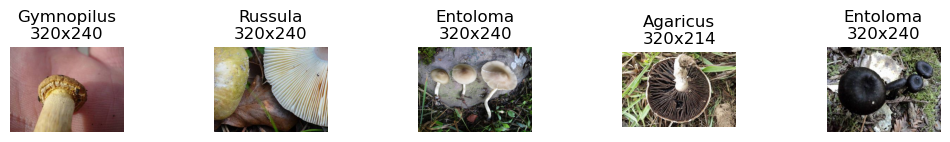

In [4]:
# Affichage de 5 images aléatoires du dataframe: (relancer la cellule pour afficher d'autres images)
tirage_aleatoire(model_data_10_filtered, model_data_10_filtered['label'], model_data_10_filtered['image_url'], nb_tirages=5)

### Extraction des features des images

In [5]:
from fonctions_data import extract_features
# /!\ La cellule qui suivra a un temps d'execution plus long : 3'50''

In [27]:
# Extraction des features des images de dans un DF nommé 'features_df'
liste_features = []

for index, row in model_data_10_filtered.iterrows():
    filepath = row['image_url']
    features = extract_features(filepath)
    liste_features.append(features)

features_df = pd.DataFrame(liste_features)
features_df['moyenne_couleurs'] = (features_df['moyenne_rouge']\
                                   + features_df['moyenne_vert']\
                                    + features_df['moyenne_bleu']) / 3

features_df.head()

,largeur,hauteur,moyenne_rouge,moyenne_vert,moyenne_bleu,moyenne_couleurs
0,320,240,72.100755,85.841055,31.750130,63.230647
1,320,240,121.305156,100.770638,99.765104,107.280299
2,320,240,115.155456,97.047813,97.722852,103.308707
3,240,320,40.128125,88.581445,38.010078,55.573216
4,320,240,59.942917,57.499375,38.753802,52.065365


In [20]:
features_df.describe()

,largeur,hauteur,moyenne_rouge,moyenne_vert,moyenne_bleu,moyenne_couleurs
count,49861.000000,49861.000000,49861.000000,49861.000000,49861.000000,49861.000000
mean,305.029001,250.722087,103.014260,94.342822,79.383570,92.246884
std,34.229117,39.557691,32.556387,30.465279,32.535193,30.299392
min,94.000000,66.000000,0.867728,3.296728,0.557301,2.533168
25%,320.000000,240.000000,81.075656,74.008825,57.160274,72.173972
50%,320.000000,240.000000,101.166758,93.115586,76.686198,90.691654
75%,320.000000,256.000000,121.793268,112.054023,97.927266,109.400295
max,320.000000,320.000000,249.952535,249.753247,249.393715,249.699832


<Figure size 1600x1200 with 0 Axes>

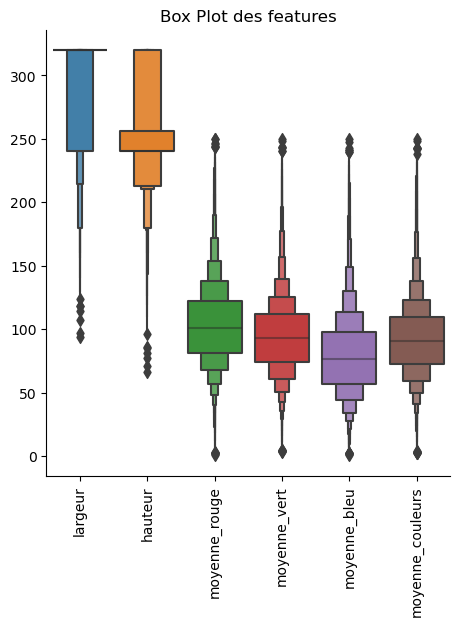

In [22]:
# Boxplot des features
plt.figure(figsize=(16,12))
sns.catplot(features_df, kind='boxen')
plt.grid(False)
plt.title('Box Plot des features')
plt.xticks(rotation = 90);

### Analyses des dimensions

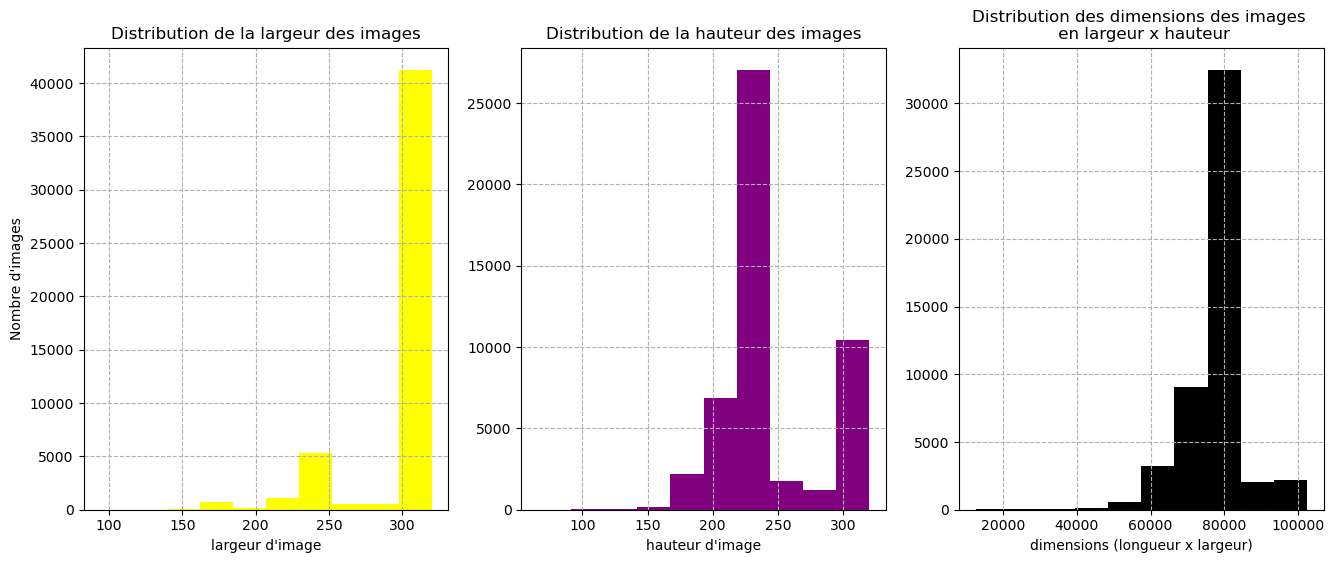

In [28]:
# On génère 3 graphs correspondant aux dimensions des images
features_df['dimensions'] = (features_df['largeur'] * features_df['hauteur'])
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(16, 6))


# Graph des largeurs
ax1.hist(x = 'largeur', data = features_df, color='yellow')
ax1.set_title('Distribution de la largeur des images')
ax1.set_xlabel('largeur d\'image')
ax1.set_ylabel('Nombre d\'images')
ax1.grid(True, linestyle = '--')

# Graph des hauteurs
ax2.hist(x = 'hauteur', data = features_df, color='purple')
ax2.set_title('Distribution de la hauteur des images')
ax2.set_xlabel('hauteur d\'image')
ax2.grid(True, linestyle = '--')
ax2.sharey=ax1

# Grah des dimensions
ax3.hist(x = 'dimensions', data = features_df, color='black')
ax3.set_title('Distribution des dimensions des images \n en largeur x hauteur')
ax3.set_xlabel('dimensions (longueur x largeur)')
ax3.grid(True, linestyle = '--')
ax2.sharey=ax1;

### Analyses des canaux RGB

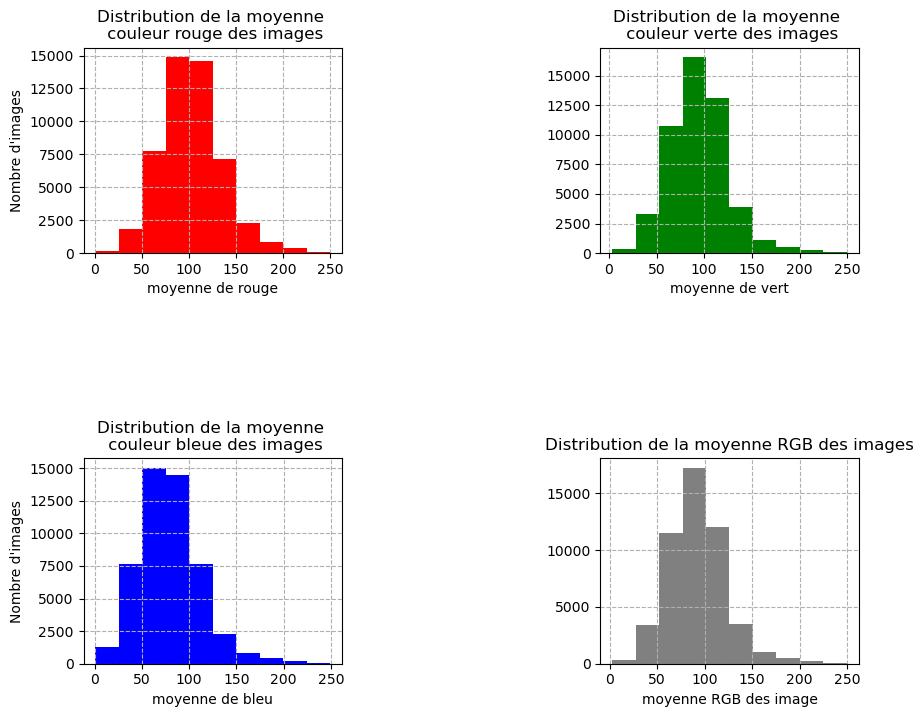

In [24]:
# On génère des graphs pour analsyer les canaux RGB de simages

fig, ((ax4,ax5),(ax6,ax7)) = plt.subplots(2,2, figsize=(10,8))
plt.subplots_adjust(wspace=1, hspace=1)

# Graph de la moyenne canal rouge des images
ax4.hist(x = 'moyenne_rouge', data = features_df, color='red')
ax4.set_title('Distribution de la moyenne \n couleur rouge des images')
ax4.set_xlabel('moyenne de rouge')
ax4.grid(True, linestyle = '--')
ax4.set_ylabel('Nombre d\'images')

# Graph de la moyenne canal vert des images
ax5.hist(x = 'moyenne_vert', data = features_df, color='green')
ax5.set_title('Distribution de la moyenne \n couleur verte des images')
ax5.set_xlabel('moyenne de vert')
ax5.grid(True, linestyle = '--')
ax5.sharey=ax4

# Graph de la moyenne canal bleu des images
ax6.hist(x = 'moyenne_bleu', data = features_df, color='blue')
ax6.set_title('Distribution de la moyenne \n couleur bleue des images')
ax6.set_xlabel('moyenne de bleu')
ax6.grid(True, linestyle = '--')
ax6.set_ylabel('Nombre d\'images')

# Graph de la moyenne RGB images
ax7.hist(x = 'moyenne_couleurs', data = features_df, color='gray')
ax7.set_title('Distribution de la moyenne RGB des images')
ax7.set_xlabel('moyenne RGB des image')
ax7.grid(True, linestyle = '--')
ax7.sharey=ax6

In [29]:
# On prépare un DF 'gb' qui permettra d'analyser plus profondément les canaux RGB par classe plutot qu'une tendance generale
features_df = features_df.merge(model_data_10_filtered, left_index=True, right_index=True)
features_df.drop(['image_lien', 'image_url', 'saison'], axis = 1, inplace = True)

gb = features_df.groupby('label').agg({
'largeur': 'mean',
'hauteur': 'mean',
'moyenne_rouge': 'mean',
'moyenne_vert': 'mean',
'moyenne_bleu': 'mean',
'moyenne_couleurs': 'mean',
'dimensions': 'sum'
})

gb.reset_index(inplace=True)
gb

,label,largeur,hauteur,moyenne_rouge,moyenne_vert,moyenne_bleu,moyenne_couleurs,dimensions
0,Agaricus,302.936414,252.775578,98.669982,91.290501,79.163078,89.707853,342855824
1,Amanita,298.698383,256.612850,96.924784,90.267996,76.437242,87.876674,368206242
2,Cortinarius,308.018364,246.758106,107.085583,95.328594,79.970714,94.128297,523957719
3,Entoloma,305.161817,250.935937,104.501183,98.439882,82.728496,95.223187,296091251
4,Gymnopilus,304.305823,252.073451,116.750686,101.821696,82.273906,100.282096,283495846
5,Inocybe,308.678692,247.348816,105.683751,96.879980,80.243048,94.268926,334995840
6,Mycena,301.916193,251.970982,98.051015,91.040665,75.162532,88.084737,369192763
7,Pluteus,304.067776,253.656361,105.749417,97.645187,83.523519,95.639374,256011952
8,Psathyrella,304.104606,252.188720,103.354856,96.756536,81.243273,93.784888,387576537
9,Russula,308.669016,247.579663,98.678162,89.863356,76.981754,88.507757,601448810


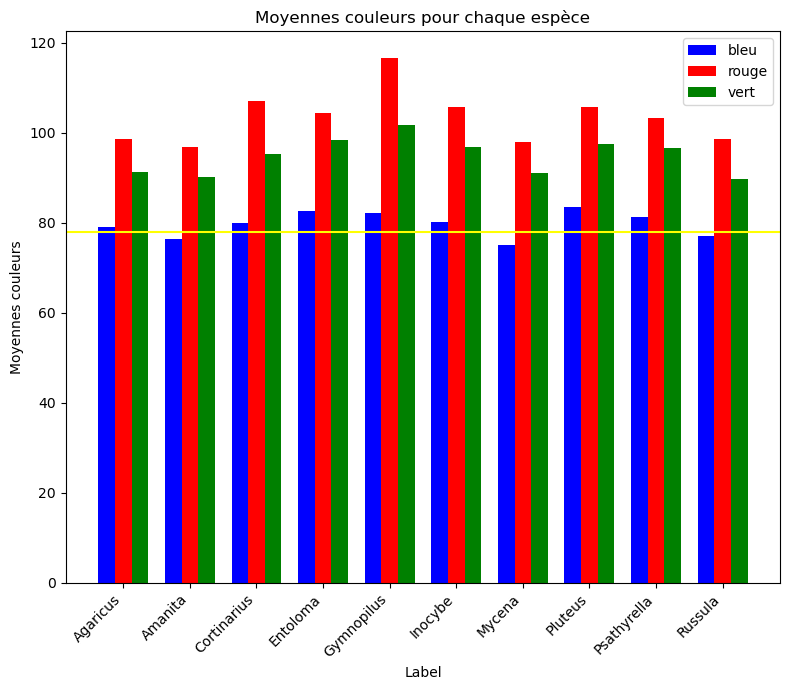

In [30]:
# Construction du graph permettant de dagéger les moyennes de couleurs par classes
x = np.arange(len(gb))
fig, ax = plt.subplots(figsize=(8, 7))
width = 0.25  # Largeur des barres

rects1 = ax.bar(x - width, gb['moyenne_bleu'], width=width, label='bleu', color='blue')
rects2 = ax.bar(x, gb['moyenne_rouge'], width=width, label='rouge', color='red')
rects3 = ax.bar(x + width, gb['moyenne_vert'], width=width, label='vert', color='green')

ax.set_xlabel('Label')
ax.set_ylabel('Moyennes couleurs')
ax.set_title('Moyennes couleurs pour chaque espèce')
ax.set_xticks(x)
ax.set_xticklabels(gb['label'], rotation=45, ha='right')
plt.axhline(y=78, c='yellow')
ax.legend()


# Afficher le diagramme
plt.tight_layout()
plt.show()